In [107]:
import pandas as pd
import sqlite3
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Connect to the SQLite database for training data
train_conn = sqlite3.connect('MegaMillions_Train.db')

# Retrieve necessary features for training from the database
query_number_freq = "SELECT * FROM NumberFrequencies"
query_hot_numbers = "SELECT * FROM HotNumbers"
query_cold_numbers = "SELECT * FROM ColdNumbers"
query_transition_matrix = "SELECT * FROM TransitionMatrix"
query_tightness_test = "SELECT * FROM TightnessTest"

train_number_freq = pd.read_sql_query(query_number_freq, train_conn)
train_hot_numbers = pd.read_sql_query(query_hot_numbers, train_conn)
train_cold_numbers = pd.read_sql_query(query_cold_numbers, train_conn)
train_transition_matrix = pd.read_sql_query(query_transition_matrix, train_conn)
train_tightness_test = pd.read_sql_query(query_tightness_test, train_conn)

# Combine features into a comprehensive feature set for training
train_features = pd.concat([train_hot_numbers, train_cold_numbers, train_tightness_test], axis=1)

print(train_hot_numbers, train_cold_numbers, train_tightness_test)
train_features.dropna(inplace=True)

# Define the target variable for training
train_target_query = "SELECT [Mega Ball] FROM Interval_Data"
train_target = pd.read_sql_query(train_target_query, train_conn)

# Disconnect from the training database
train_conn.close()

# Connect to the test data SQLite database
test_conn = sqlite3.connect('MegaMillions_Test.db')

# Retrieve test data from the database
query_test_data = "SELECT * FROM Interval_Data"
test_data = pd.read_sql_query(query_test_data, test_conn)

# Feature Engineering for testing data
test_data['Numbers'] = test_data['Winning Numbers'].apply(lambda x: [int(num) for num in x.split()])
test_number_frequencies = []
for i in range(1, 76):
    freq = test_data['Numbers'].apply(lambda x: x.count(i))
    test_number_frequencies.append(freq)

test_features = pd.DataFrame(test_number_frequencies).T
test_target = test_data['Mega Ball']

# Train a Random Forest Classifier using features from the training data
model = RandomForestClassifier(n_estimators=3000, random_state=42)
model.fit(train_features, train_target.values.ravel())  # Training the model

# Make predictions on the test set
test_predictions = model.predict(test_features)

# Evaluate the model's accuracy
test_accuracy = accuracy_score(test_target, test_predictions)
print(f"Test Model Accuracy: {test_accuracy}")

# Disconnect from the test data SQLite database
test_conn.close()


   Ball1  Ball2  Ball3  Ball4  Ball5
0      2     17     31     48     50
1      3     16     28     46     52
2      1     14     26     40     55
3      7     15     30     38     56
4      4     12     25     45     64    Ball1  Ball2  Ball3  Ball4  Ball5
0     40     59     65     12     26
1     41     61      7     10     21
2     38     62     66      8     24
3     39     51     57      7     22
4     37     48      6      5     25        Ball1      Ball2      Ball3      Ball4      Ball5
0  86.769393  46.965167  39.567522  40.996726  51.667519


ValueError: Found input variables with inconsistent numbers of samples: [1, 3686]

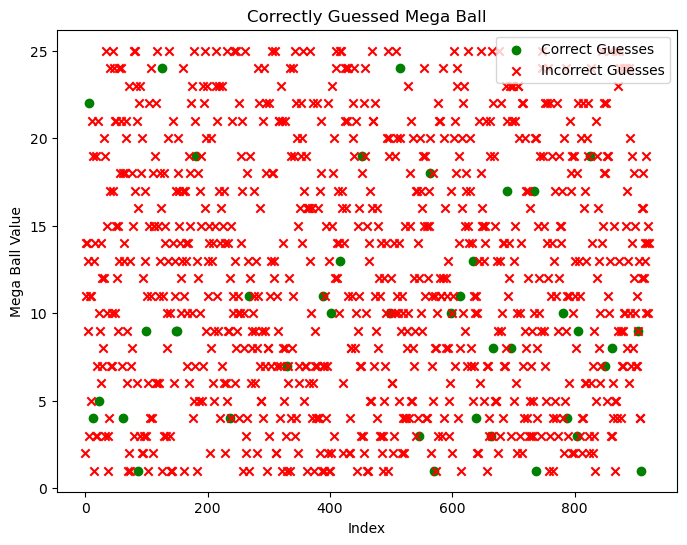

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Find the indices where predictions match y_test
correct_indices = np.where(np.array(y_test) == np.array(test_predictions))[0]

# Create a plot showing correct guesses
plt.figure(figsize=(8, 6))
plt.scatter(correct_indices, np.array(y_test)[correct_indices], color='green', label='Correct Guesses', marker='o')
plt.scatter(np.setdiff1d(np.arange(len(y_test)), correct_indices), np.array(y_test)[np.setdiff1d(np.arange(len(y_test)), correct_indices)], color='red', label='Incorrect Guesses', marker='x')
plt.xlabel('Index')
plt.ylabel('Mega Ball Value')
plt.title('Correctly Guessed Mega Ball')
plt.legend()
plt.show()